# Installation

In [1]:
! pip uninstall opencv-python -y
! pip uninstall opencv-contrib-python -y
! pip install opencv-python==3.4.11.45
! pip install opencv-contrib-python==3.4.11.45
! pip install tqdm

Found existing installation: opencv-python 4.5.3.56
Uninstalling opencv-python-4.5.3.56:
  Successfully uninstalled opencv-python-4.5.3.56


  Using cached tqdm-4.62.3-py2.py3-none-any.whl (76 kB)


In [3]:
!pip install sklearn

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=0ebad31d96aa86ae4f11159a8095d3c27b794bfa149b1ba52c972e342f867ec1
  Stored in directory: c:\users\master\appdata\local\pip\cache\wheels\46\ef\c3\157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [5]:
!pip install pandas

# importing libraries

In [2]:
import argparse
import cv2
import numpy as np 
import os
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import svm, metrics
from sklearn.preprocessing import LabelEncoder
from skimage import feature
from skimage import exposure
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics.pairwise import chi2_kernel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import time
from skimage.feature import hog
from skimage.io import imread
import joblib,glob,os,cv2

#  data loading

In [25]:
#TRAINING DATA
Categ=['pos','neg']
traindata_=[] 
trainlabel=[] 
datadirectory='Train' 
#path which contains all the categories of images
for i in Categ:
    path=os.path.join(datadirectory,i)
    for image in os.listdir(path):
        t_image=imread(os.path.join(path,image))
        t_image=resize(t_image,(64,128))
        
  #append computed HOGs in train data
        traindata_.append(t_image)
        trainlabel.append(Categ.index(i))
        
        
# TEST DATA
Categ=['pos','neg']
testdata_=[] 
testlabel=[] 
datadirectory='Test' 

for i in Categ:
    path=os.path.join(datadirectory,i)
    for img in os.listdir(path):
        t_image=imread(os.path.join(path,img))
        t_image=resize(t_image,(64,128))
        
  #append computed HOGs in test data
        testdata_.append(t_image)
        testlabel.append(Categ.index(i))

# hog function

In [26]:
def HOG_func(image):
    (H_vector, hog_Image) = feature.hog(image, orientations = 9,
    pixels_per_cell  = (8, 8), cells_per_block  = (3, 3), transform_sqrt=True,
    block_norm  = 'L1' , visualize=True)
    return (H_vector, hog_Image)
#APPLY HOG \
traindata=[]
for i in trainlabel:
    (hog, hogimage) = HOG_func(traindata_[i])
    traindata.append(hog)

# random forest classifier training

In [27]:
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
randomforest = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
randomforest.fit(traindata, trainlabel);

# svm training

In [28]:
from sklearn.svm import LinearSVC
SVCmod = LinearSVC(max_iter=3000)
SVCmod.fit(traindata, trainlabel)
print(" trained")

 trained


# application of hog on test data

In [30]:
testdata=[]
for i in testlabel:
  # pre-process image here if needed
  # Computing the HOG features
    (hog, hogimage) = HOG_func(testdata_[i])
  #append computed HOGs in train data
    testdata.append(hog)
#get train labels

# testing

In [34]:
pred_labels = SVCmod.predict(testdata)
#CLASSIFICATION FOR MODELS
from sklearn.metrics import classification_report
print(classification_report(testlabel, pred_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1132
           1       1.00      1.00      1.00       453

    accuracy                           1.00      1585
   macro avg       1.00      1.00      1.00      1585
weighted avg       1.00      1.00      1.00      1585



In [35]:
#predictions for RANDOM FOREST
pred_labelsRF = randomforest.predict(testdata)
print(classification_report(testlabel, pred_labelsRF))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83      1132
           1       0.00      0.00      0.00       453

    accuracy                           0.71      1585
   macro avg       0.36      0.50      0.42      1585
weighted avg       0.51      0.71      0.60      1585



C:\Users\MASTER\anaconda3\envs\computer_vision\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MASTER\anaconda3\envs\computer_vision\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MASTER\anaconda3\envs\computer_vision\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

# visualizing some images

Actual Label =
0
Predicted Label =
0
Actual Label rf =
0
Predicted rf =
0


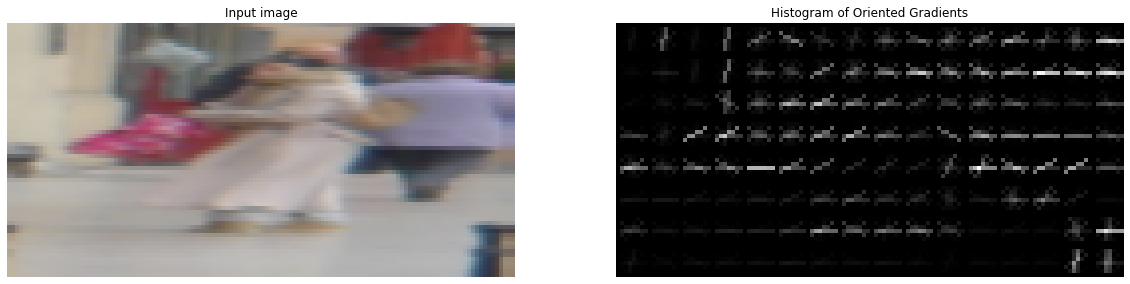

Actual Label =
0
Predicted Label =
1
Actual Label rf =
0
Predicted rf =
1


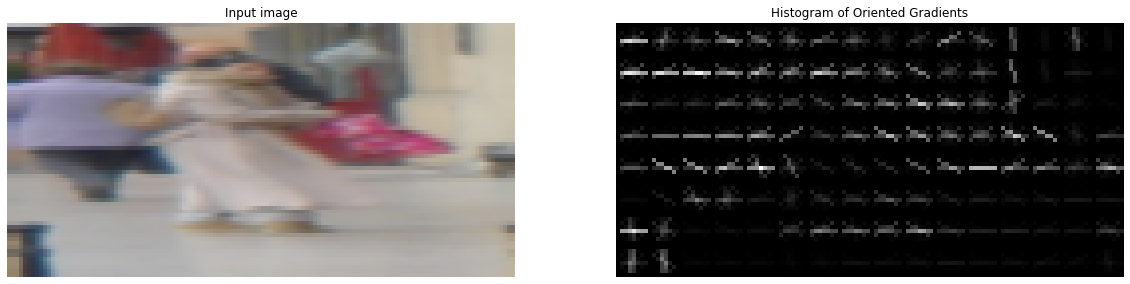

Actual Label =
0
Predicted Label =
0
Actual Label rf =
0
Predicted rf =
0


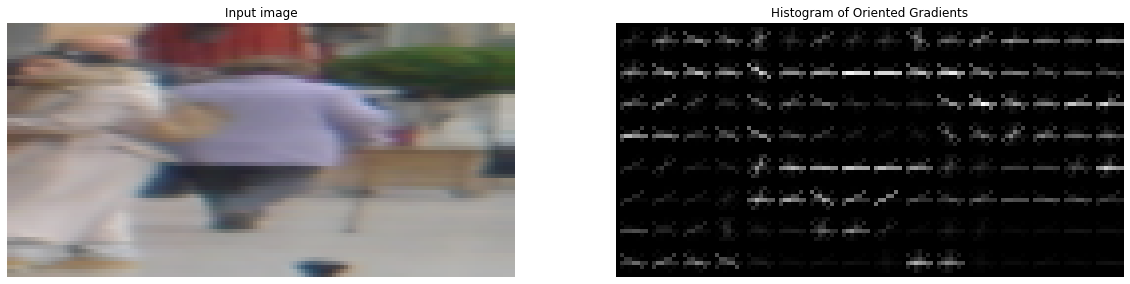

Actual Label =
0
Predicted Label =
1
Actual Label rf =
0
Predicted rf =
1


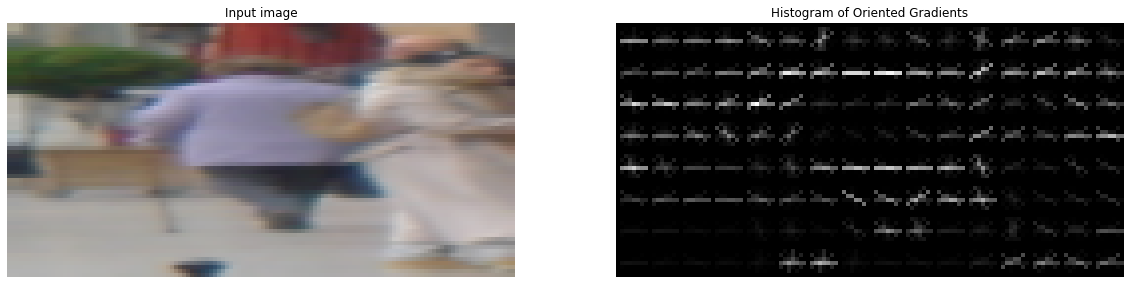

In [36]:

for i in range(30,34):
    image = testdata_[i]
    (hog, hogimage) = HOG_func(image)
    obtained_label = SVCmod.predict([hog])
    obtained_labelrf = randomforest.predict([hog])
    
    print("Actual Label =")
    print(testlabel[i])
    print("Predicted Label =")
    print(obtained_label[0])
    print("Actual Label rf =")
    print(testlabel[i])
    print("Predicted rf =")
    print(obtained_label[0])
    
    figr, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 20), sharex=True, sharey=True)
    ax1.axis('off')
    ax1.imshow(image, cmap="gray")
    ax1.set_title('Input image')
    ax2.axis('off')
    ax2.imshow(hogimage,cmap=plt.cm.gray)
    ax2.set_title('Histogram of Oriented Gradients')
    plt.show()
